# ⚡️study by 석민⚡️

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# matplotlib 기초

In [ ]:
# 폰트 깨짐 방지
import matplotlib.pyplot as plt  # matplotlib 설치시 혹은 터미널 시작시, 1번과 2번, 3번 명령어 입력으로 폰트깨짐 해결.(Mac 한정.)
from matplotlib import rc        # 1번
rc('font', family='AppleGothic') # 2번
plt.rcParams['axes.unicode_minus'] = False # 3번

### 📍plt.plot( )
- x와 y는 동일한 길이의 배열 또는 리스트로, 각각 x축과 y축에 대응하는 데이터를 나타냅니다.
- plt.plot() 함수는 많은 선택적 매개변수를 가집니다. 아래는 주요 매개변수들의 설명입니다:

>- color: 선의 색상을 지정합니다.
>- linestyle: 선의 스타일을 지정합니다. ('-', '--', '-.', ':' 등)
>- linewidth: 선의 너비를 지정합니다.
>- marker: 데이터 포인트에 표시할 마커의 스타일을 지정합니다. ('o', '.', '^', 's' 등)
>- label: 이 그래프에 대한 레이블을 지정합니다. 이 레이블은 plt.legend() 호출 시 범례에 사용됩니다.

In [191]:
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")
# black 권고: 아마 정식 코드로 호출해서 사용하라는 의미

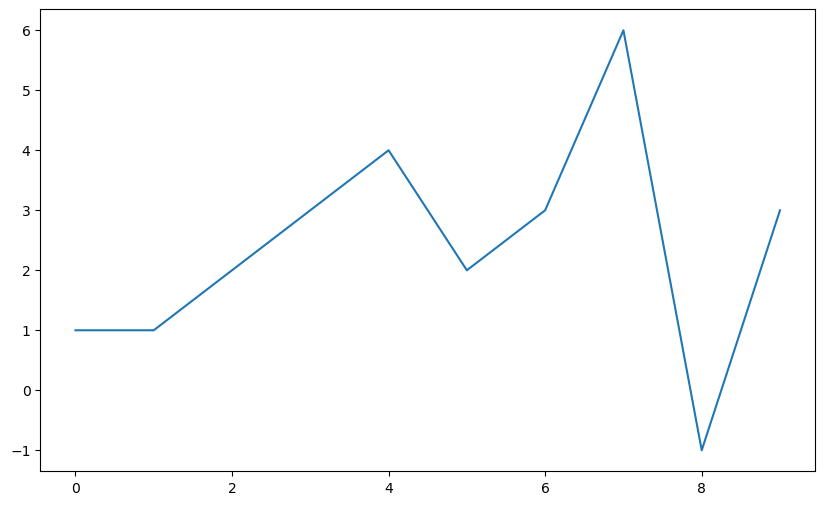

In [194]:
plt.figure(figsize = (10, 6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 6, -1, 3])
plt.show()

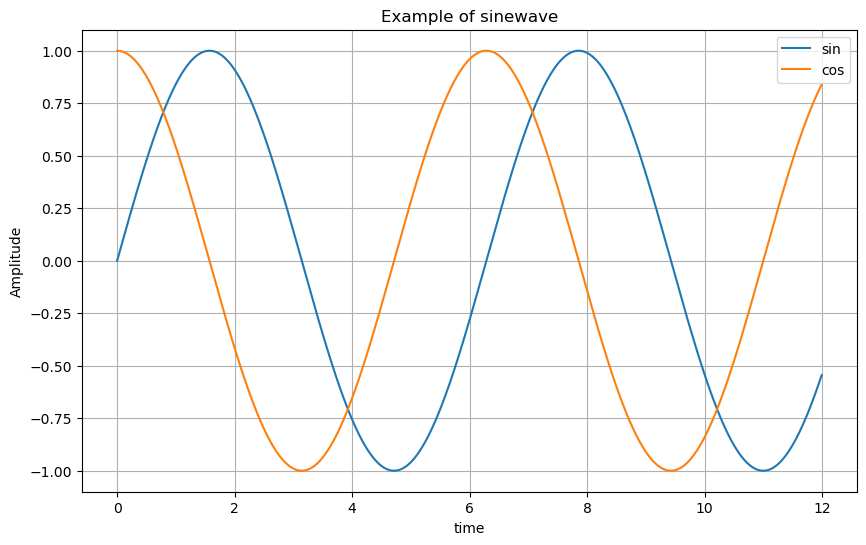

In [214]:
t = np.arange(0, 12, 0.01)
y = np.sin(t)

def draw_graph1():
    plt.figure(figsize = (10, 6))
    plt.plot(t, np.sin(t), label = "sin")
    plt.plot(t, np.cos(t), label = "cos")
    
    plt.title("Example of sinewave")
    plt.xlabel("time")
    plt.ylabel("Amplitude")
    
    plt.grid()
    plt.legend()
    plt.show()
    
draw_graph1()

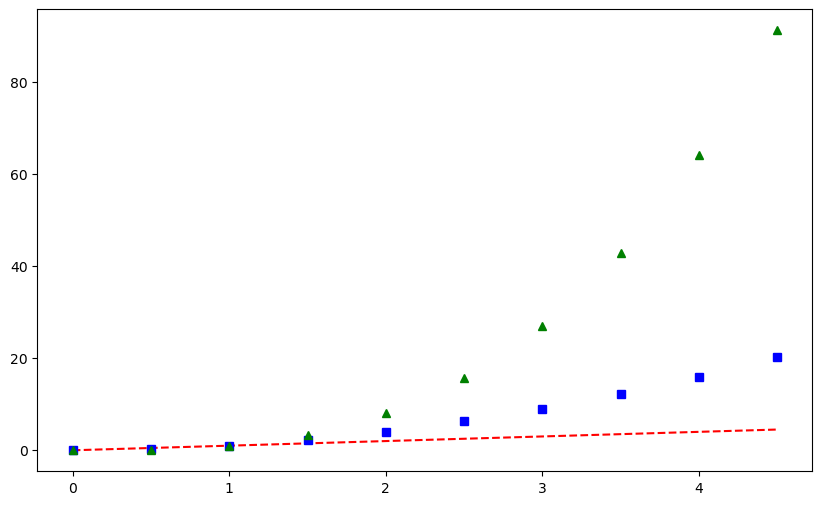

In [212]:
t = np.arange(0, 5, 0.5)

def draw_graph2():
    
    plt.figure(figsize = (10, 6))
    plt.plot(t, t, "r--")
    plt.plot(t, t**2, "bs")
    plt.plot(t, t**3, "g^")
    
draw_graph2()

### 📍 plt.scatter( )
- plt.scatter() 함수는 여러 가지 선택적 매개변수를 가집니다:

>- s: 각 점의 크기를 설정합니다. 스칼라 또는 배열로 설정할 수 있습니다.
>- c: 점의 색상을 설정합니다. 색 이름, 문자열, RGB 튜플 또는 배열을 사용할 수 있습니다.
>- marker: 점의 모양을 설정합니다.
>- alpha: 점의 투명도를 설정합니다. 0(완전 투명)에서 1(완전 불투명)까지의 값을 사용할 수 있습니다.
>- edgecolors: 점 주변의 색상을 설정합니다.

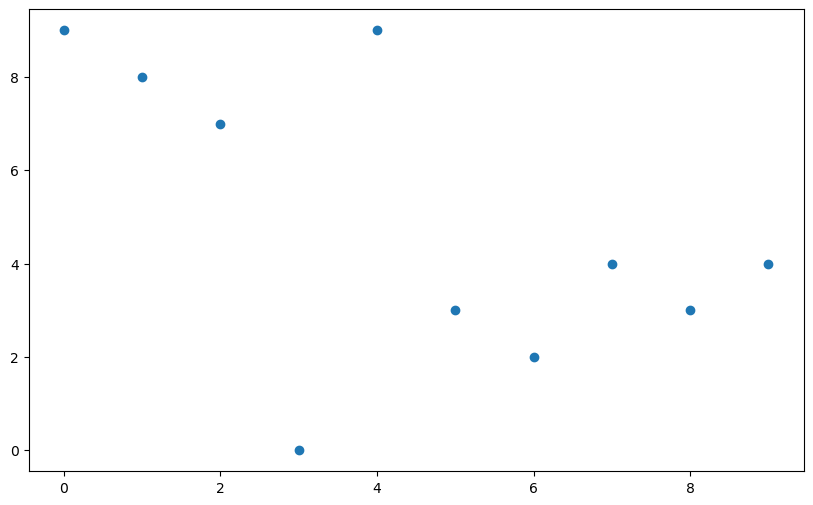

In [225]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 0, 9, 3, 2, 4, 3, 4])

colormap = t

# colormap을 적용할 수 있다.
def draw_graph3():
    
    plt.figure(figsize = (10, 6))
    plt.scatter(t, y)
    plt.show()
    
draw_graph3()

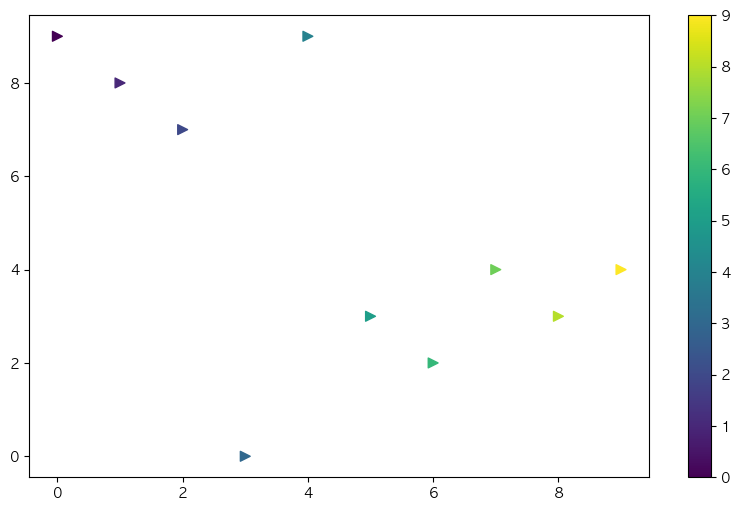

In [245]:
colormap = t

def draw_graph4():
    
    plt.figure(figsize = (10, 6))
    plt.scatter(t, y, s=50, c=colormap, marker=">")
    plt.colorbar()
    plt.show()
    
draw_graph4()

# 데이터 시각화

<AxesSubplot:ylabel='구별'>

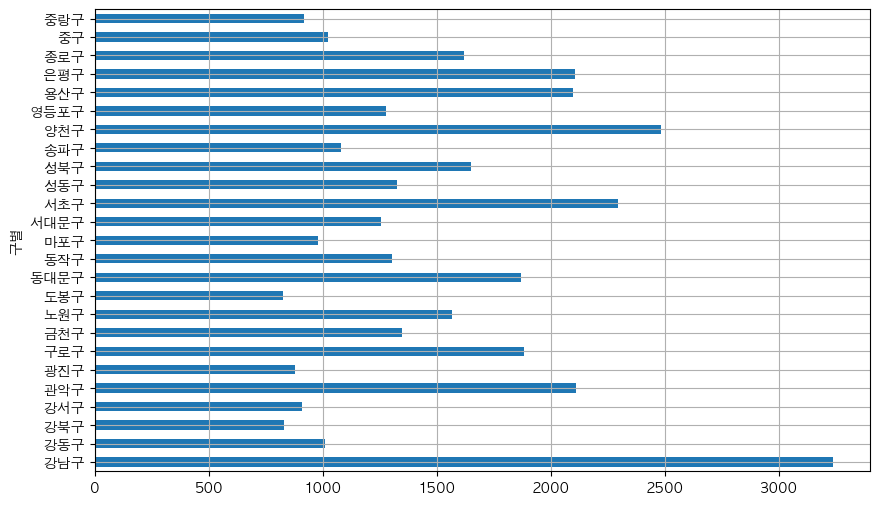

In [233]:
data_result["소계"].plot(kind = "barh", grid = True, figsize = (10, 6))

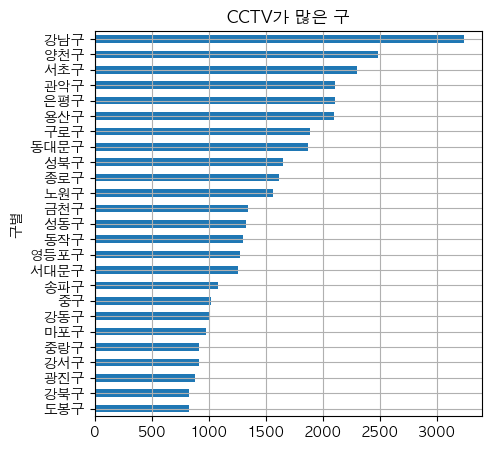

In [246]:
def draw_graph5():
    
    data_result["소계"].sort_values().plot(
    kind = "barh",
    grid = True,
    title = "CCTV가 많은 구",
    figsize = (5, 5))
draw_graph5()

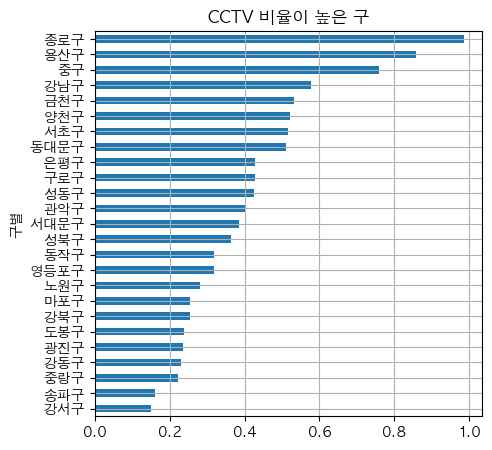

In [243]:
def draw_graph6():
    
    data_result["CCTV 비율"].sort_values().plot(
    kind = "barh",
    grid = True,
    title = "CCTV 비율이 높은 구",
    figsize = (5, 5))
    
draw_graph6()

# 데이터의 경향을 표시

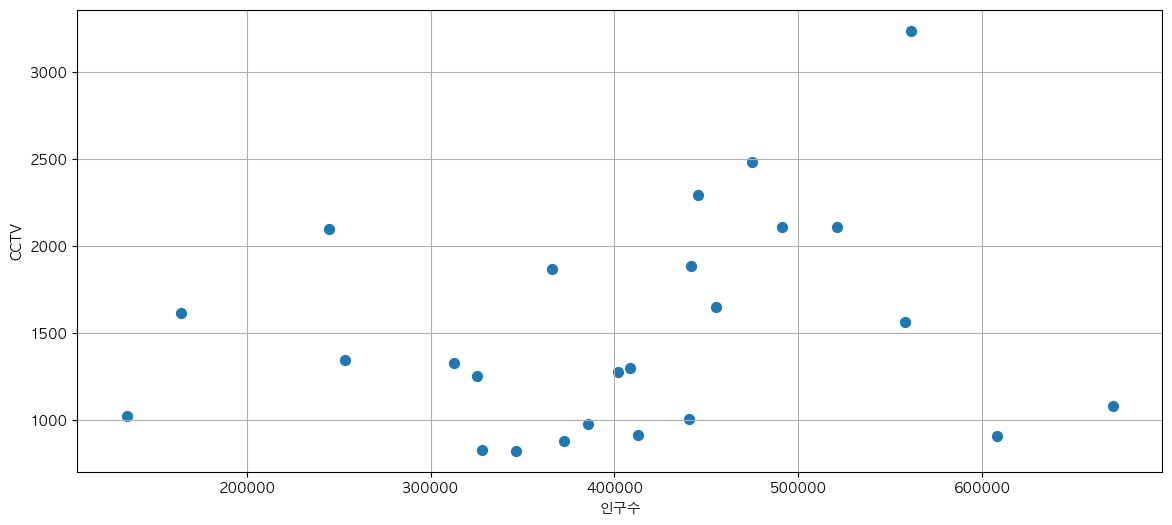

In [289]:
def draw_graph7():
    
    plt.figure(figsize = (14, 6))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()
    
draw_graph7()

### 📍 Numpy를 이용한 1차 직선 만들기 
- numpy가 제공하는 간단한 함수를 이용해서 1차 직선을 만들어 그래프로 비교하자
### 📎 절차
> - np.polyfit : 직선을 구성하기 위한 계수 계산한다.
> - np.poly1d : polyfit으로 찾은 계수로 python에서 사용할 함수로 만들어 준다.

In [251]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [252]:
# polyfit 에서 찾은 계수를 넣어서 함수 완성
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [253]:
# 인구 400000인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수
f1(400000)

1509.780925241333

In [257]:
# 경향선을 그리기 위해 X데이터 생성
# np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성
fx = np.linspace(100000, 700000, 100)

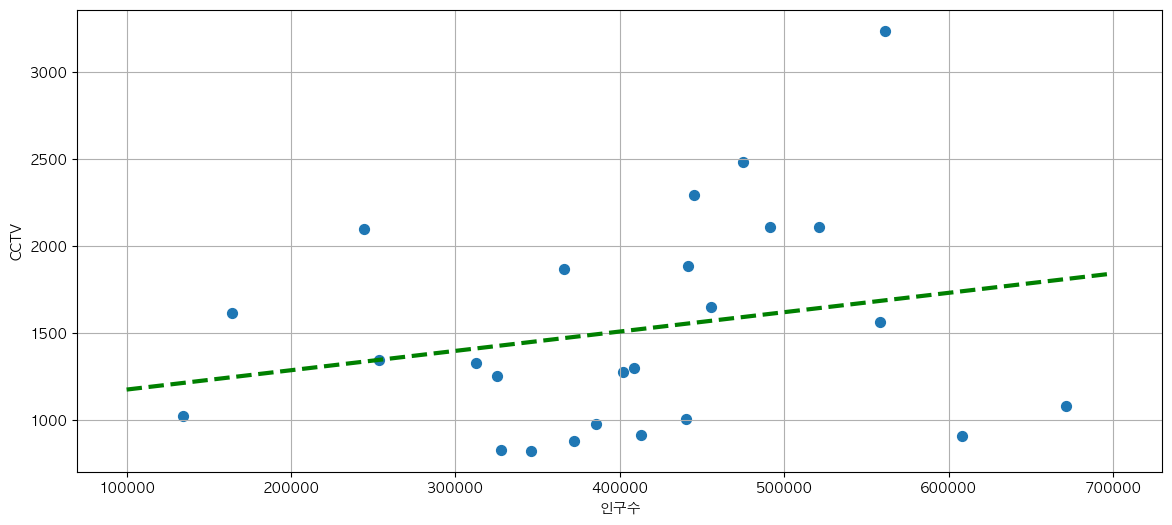

In [288]:
def draw_graph8():
    
    plt.figure(figsize = (14, 6))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, c="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()
    
draw_graph8() 

# 강조하고 싶은 데이터를 시각화하기.

In [263]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
# 경향(trend)를 구하는 함수 만들기
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 1000)

data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

In [282]:
data_result.head(1)

,소계,최근 증가율,인구수,한국인,외국인,고령자,고령자 비율,외국인 비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,11.596073,0.87122,0.57713,1549.200326


In [265]:
# 경향 대비 CCTV를 많이 가진 구(내림차순)
data_result_f = data_result.sort_values("오차", ascending = False) 
# 경향 대비 CCTV를 적게 가진 구(오름차순))
data_result_t = data_result.sort_values("오차", ascending = True)

In [274]:
from matplotlib.colors import ListedColormap

# color map을 사용자 정의(user define)로 세팅
color_step = ["#e74c3c", "#2ecc71", "#95a5a6", "#2ecc71", "#3498db", "#3498db"]
my_cmap = ListedColormap(color_step)

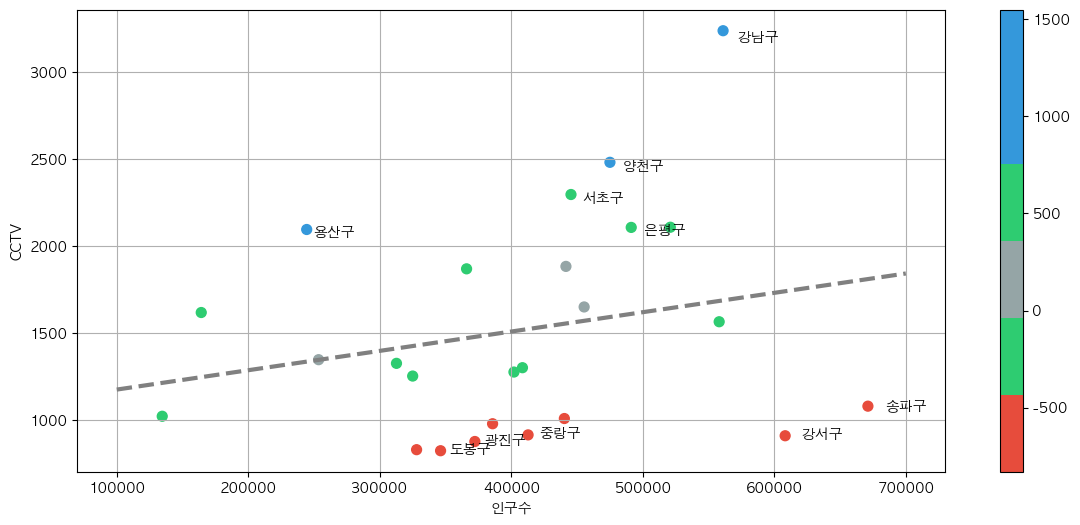

In [287]:
def draw_graph9():
    
    plt.figure(figsize = (14, 6))
    plt.scatter(data_result["인구수"], data_result["소계"], 
                c=data_result["오차"], s=50, cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, c="grey")
    
    for i in range(5):
        # 오차가 큰 데이터 5개, 구 이름을 명시
        plt.text(data_result_f["인구수"][i] * 1.02,
                data_result_f["소계"][i] * 0.98,
                data_result_f.index[i],
                fontsize = 10)
        # 오차가 작은 데이터 5개, 구 이름을 명시
        plt.text(data_result_t["인구수"][i] * 1.02,
                data_result_t["소계"][i] * 0.98,
                data_result_t.index[i],
                fontsize = 10)
    
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.colorbar()
    plt.show()
    
draw_graph9()

In [281]:
data_result.to_csv("../ds_study/data/CCTV_result(이석민).csv", sep = ",", encoding = "utf-8")